**Principle of superposition**

If $\Phi_{1}, \Phi_{2},... \Phi_{n} $ are solutions of the Laplace equation, which is linear, then for arbitrary constants $c_{1}, c_{2}, ...c_{k}$ the following 
\begin{equation}
\Phi = \sum_{k=1}^{n} c_{k}\Phi_{k}
\end{equation}
is also a solution for that equation in that region. 

\begin{equation}
\nabla^{2}\Phi = \sum_{k=1}^{n} c_{k}\nabla^{2}\Phi_{k} = 0
\end{equation}

In theory using a set of elementary solutions, the solution process of satisfying the given boundary conditions, can be reduced to an algebraic search for the right linear combination of these elementary solutions. 

**Building blocks of potential flow**

We want to numerically express the flow field of a source and a sink, two potential flow solutions, so we can plot these flows and admire them.

Let's define an evenly spaced Cartesian grid of points within a spatial domain that is 4 units of length wide in the x-direction and 2 units of length wide in the y-direction, i.e. $x,y∈[−2,2],[−1,1]$.

In [17]:
import numpy
from matplotlib import pyplot

In [18]:
N = 50                                # number of points in each direction
x_start, x_end = -2.0, 2.0            # boundaries in the x-direction
y_start, y_end = -1.0, 1.0            # boundaries in the y-direction
x = numpy.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
y = numpy.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates

#print('x = ', x)
#print('y = ', y)

X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

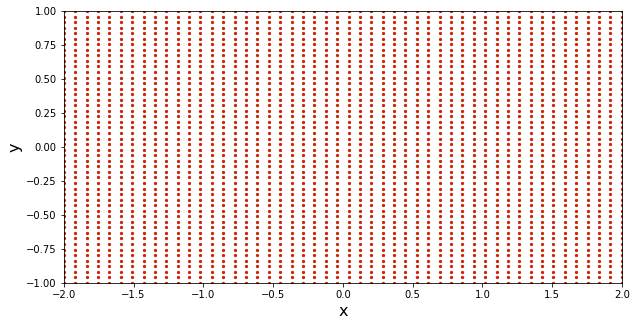

In [19]:
#To get plots in our notebook. This command configures the plotting 
#module to output plots inline, as static PNG images
%matplotlib inline 

# plot the grid of points
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(X, Y, s=5, color='#CD2305', marker='o')

A source is a point from which we imagine that fluid is flowing out, uniformly. Thus, all the streamlines radiate from a single point as straight lines and the radial velocity decreases with the distance from the source point. Let's consider first the purely two-dimensional case. Because of the radial symmetry, it is convenient to use a cylindrical coordinate system, $(r,θ)$. The angle $\theta$ is $tan^{−1}(y/x)$. The velocity components (radial and tangential) are:

\begin{equation}
u_{r}(r,\theta) = \frac{\sigma}{2\pi r}, \quad u_{\theta}(r, \theta)=0
\end{equation}

where $\sigma$ represents the source strength.

For stream function in cylindrical coordinates

\begin{equation}
\frac{1}{r}\frac{\partial\psi}{\partial \theta} =  u_{r}  \quad -\frac{\partial\psi}{\partial r} =  u_{\theta}
\end{equation}

which integrates into

\begin{equation}
\psi = \frac{\sigma}{2\pi}\theta +constant
\end{equation}

In practical problems, we are more interested in the velocity components that are obtained by differentiation of the stream function, so that the constant can be dropped.

In Cartesian coordinates, the velocity field $(u,v)$ at position $(x,y)$ corresponding to a source of strength $\sigma$ located at $(xsource,ysource)$ is given by:

\begin{equation}
u = \frac{\partial \psi}{\partial y}=\frac{\sigma}{2\pi} \frac{x-x_{source}}{(x-x_{source})^2+(y-y_{source})^2}
\end{equation}

and

\begin{equation}
v = -\frac{\partial \psi}{\partial x}=\frac{\sigma}{2\pi} \frac{y-y_{source}}{(x-x_{source})^2+(y-y_{source})^2}
\end{equation}

Let's calculate the velocity field for our grid of points. We'll place the source at the location $(−1,0)$ and give it a strength $\sigma=5$.

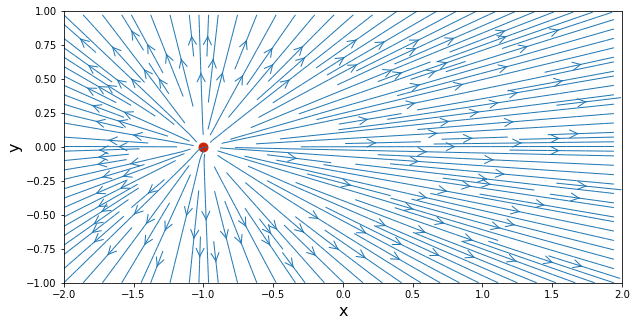

In [20]:
strength_source = 5.0                      # source strength
x_source, y_source = -1.0, 0.0             # location of the source

# compute the velocity field on the mesh grid
u_source = (strength_source / (2 * math.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
v_source = (strength_source / (2 * math.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))

# plot the streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_source, v_source,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o');

We will place the sink at the location $(1,0)$ and give it an equal strength to our source.

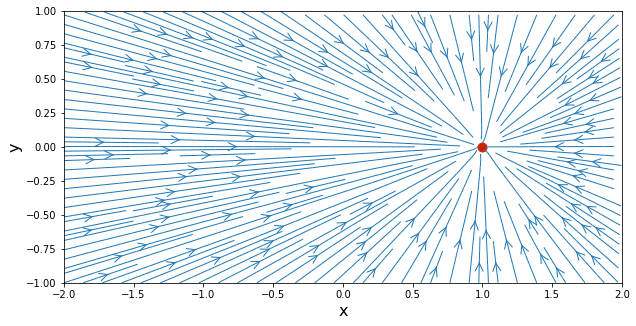

In [21]:
strength_sink = -5.0                     # strength of the sink
x_sink, y_sink = 1.0, 0.0                # location of the sink

# compute the velocity on the mesh grid
u_sink = (strength_sink / (2 * math.pi) *
          (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))
v_sink = (strength_sink / (2 * math.pi) *
          (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2))

# plot the streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_sink, v_sink,
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sink, y_sink,
               color='#CD2305', s=80, marker='o');

**Source-sink pair**

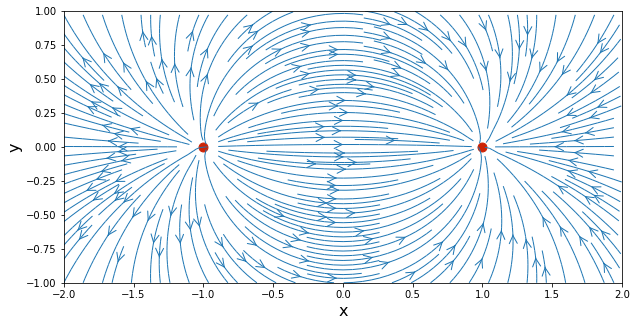

In [22]:
# compute the velocity of the pair source/sink by superposition
u_pair = u_source + u_sink
v_pair = v_source + v_sink

# plot the streamlines of the pair source/sink
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_pair, v_pair,
                  density=2.0, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], 
               color='#CD2305', s=80, marker='o');

*Challenge task*

Write your own code for plotting the potential lines, instead of the stream lines. You might want to use the `contour()` function for this.

**Source-sink pair in a uniform flow**

We re-write the important parts so that this exercise in independent from the previous one!

We have our set of points now, and the two arrays $X$ and $Y$ contain their $x-$ and $y-$coordinates (respectively) of every point on the rectangular grid (as before).

In [23]:
import numpy
import math
from matplotlib import pyplot
# display figures in the Notebook
%matplotlib inline

N = 200                               # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

The streamlines of a freestream with speed $U_{\infty}$ and angle of attack $α$ are given by:

\begin{equation}
\psi_{freestream}(x,y) =  U_{\infty}(y\cos a - x\sin a)
\end{equation}


In [24]:
# for horizontal flow(U_inf, a=0)
u_inf = 1.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

# compute the stream-function
psi_freestream = u_inf * Y

The stream function of a source flow located at $(x_{source},_{source})$ is

\begin{equation}
\psi_{source}(x,y) =  \frac{\sigma}{2\pi} \arctan (\frac{y-y_{source}}{x-x_{source}})
\end{equation}

and the velocity components

\begin{equation}
u_{source} =\frac{\sigma}{2\pi} \frac{x-x_{source}}{(x-x_{source})^2+(y-y_{source})^2}
\end{equation}

\begin{equation}
v_{source} =\frac{\sigma}{2\pi} \frac{y-y_{source}}{(x-x_{source})^2+(y-y_{source})^2}
\end{equation}

Let's define a function called `get_velocity()` to compute the velocity components $(u,v)$ on a mesh (`X`,`Y`), given the `strength` of the singularity and its location (`xs`,`ys`). We define it with the `def` command, followed by our chosen name for the function, and any parameters inside the parenthesis.

In [25]:
def get_velocity(strength, xs, ys, X, Y):    
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    # the message after the function definition? It's there 
    #to help the user know how the function works (we call it a "docstring")
    
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

Any message between `"""Triple quotes"""` right after a function definition will be displayed to the user when calling `help()`, like this:

In [26]:
help(get_velocity)

Help on function get_velocity in module __main__:

get_velocity(strength, xs, ys, X, Y)
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.



Similarly, we define another function to compute the stream-function of the singularity (source or sink) on the mesh grid, and call it `get_stream_function()`.

In [27]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi

Let's use our brand new functions for the first time:

In [28]:
strength_source = 5.0            # strength of the source
x_source, y_source = -1.0, 0.0   # location of the source

# compute the velocity field
u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

# compute the stream-function
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

The streamlines of the combination of a freestream and a source flow are:

\begin{equation}
\psi = \psi_{freestream} + \psi_{source} = U_{\infty}y + \frac{\sigma}{2\pi} \arctan (\frac{y-y_{source}}{x-x_{source}})
\end{equation}

the velocity field induced by the new flow pattern is simply the sum of the freestream velocity field and the source velocity field. The stagnation points in the flow are points where the velocity is zero. We solve for $u=0, v=0$ and find

\begin{equation}
x_{stagnation} = x_{source} - \frac{\sigma}{2\pi U_{\infty}}
\end{equation}
\begin{equation}
y_{stagnation} = y_{source}
\end{equation}

The streamline containing the stagnation point is called the *dividing streamline*. It separates the fluid coming from the freestream and the fluid radiating from the source flow. On the streamline plot, we'll add a red curve to show the dividing streamline, and we'll use the `contour()` function for that.

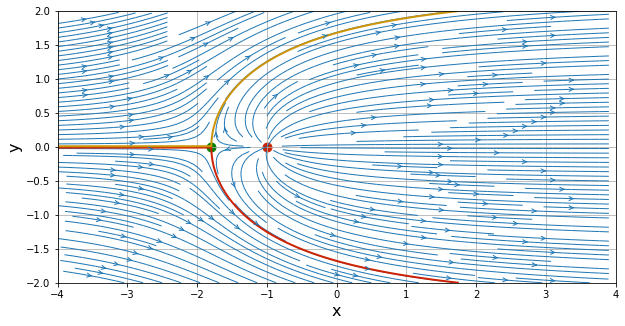

In [43]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2],#, strength_source / 2], 
               colors='#CD2305', linewidths=2, linestyles='solid');
pyplot.contour(X, Y, psi, 
               levels=[strength_source / 2],#, strength_source / 2], 
               colors='#CD9508', linewidths=2, linestyles='solid');

If we ignore the flow inside the dividing streamline, we can consider that a solid body. In fact, this body has a name: it is called a Rankine half body.

*Challenge task*

In fact, we can can look at the elliptical closed streamline as a solid surface and imagine that this is the flow around an egg-shaped object. It is called a *Rankine oval*.

- Use the superposition of sources, sinks and freestream to create the flow around a Rankines oval.
- What is the length and width of the Rankine oval?
- Using bernoulli's equation calculate the pressure field around the *Rankine's oval*. Where is the pressure maximum. Why?

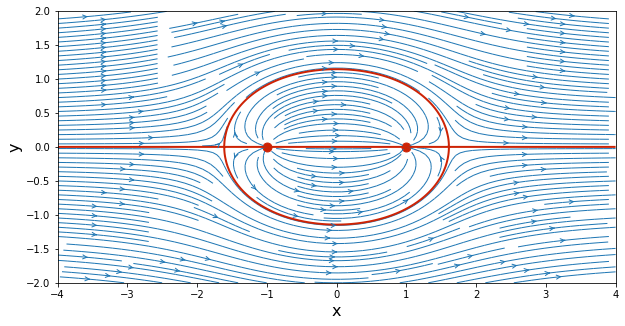

In [45]:
strength_sink = -5.0        # strength of the sink
x_sink, y_sink = 1.0, 0.0   # location of the sink

# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the grid mesh
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

**Bernoulli's equation and the pressure coefficient**

A very useful measurement of a flow around a body is the coefficient of pressure $C_{p}$. To evaluate the pressure coefficient, we apply Bernoulli's equation for an incompressible flow:

\begin{equation}
p_{\infty} + \frac{1}{2}\rho V_{\infty}^2 = p + \frac{1}{2}\rho V^2
\end{equation}

We define the pressure coefficient

\begin{equation}
Cp = \frac{p - p_{\infty}}{\rho V_{\infty}^2} = 1- (\frac{V}{V_{\infty}})^2
\end{equation}

Note that in an incompressible flow, $Cp=1$ at a stagnation point.

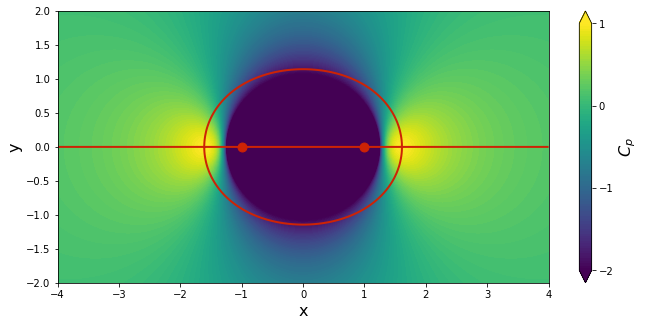

In [46]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');